## The netCDF format

### What is NetCDF?

&nbsp;&nbsp;
<center>
<iframe width="800" height="450" src="https://www.youtube.com/embed/9DlZtYzyNx0?si=iz1NLd_e7ejQilTM" title="The Argo Online School 311 -  Using Argo Data.  The netCDF format." frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</center>

_The Argo Online School 311 -  Using Argo Data.  The netCDF format._

![NetCDFLogo](https://raw.githubusercontent.com/euroargodev/argoonlineschool/31f69cb6e66d4d6681ccc41001fa8df9f94ca6c0/images/logoNetcdf.png) netCDF stands for **Network Common Data Form** and it is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data.  

[**NetCDF**](https://www.unidata.ucar.edu/software/netcdf/) is maintained by [**Unidata**](https://www.unidata.ucar.edu/), one of the University Corporation for Atmospheric Research (UCAR)'s Community Programs (UCP). Unidata also supports and maintains netCDF programming interfaces for C, C++, Java, and Fortran. Programming interfaces are also available for Python, IDL, MATLAB, R, Ruby, and Perl. Thanks [**UCAR**](https://www.ucar.edu/)!

### How is the netCDF format?

&nbsp;&nbsp;
<center>
<iframe width="800" height="450" src="https://www.youtube.com/embed/_qFuPt-D90M?si=gyBE0Xi0TOMnH7Ut&amp;start=3" title="The Argo Online School 312 -  Using Argo Data.  The netCDF format: How is the netCDF format?" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</center>

_The Argo Online School 312 -  Using Argo Data.  The netCDF format: How is the netCDF format?_

The properties that make netCDF so useful are the following ones:

**Self-Describing** A netCDF file includes information about the data it contains.

**Portable** A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.

**Sharable** One writer and multiple readers may simultaneously access the same netCDF file.

**Scalable** Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.

**Appendable** Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.

**Archivable** Access to all earlier forms of netCDF data will be supported by current and future versions of the software.

## Exploring a netCDF File

Let's see most of these properties of a **netCDF** file by using actual data from the high-resolution Blended Analysis of daily Sea Surface Temperature, [**NOAA OI SST V2 High-Resolution Dataset**](https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html#detail) Thanks [**NOAA**](https://www.noaa.gov/)!!

I have pre-downloaded the daily data from 2020 and it is in the ./Data folder.  Refer to the section [Data used in the Argo Online School](https://euroargodev.github.io/argoonlineschool/Lessons/L03_UsingArgoData/Chapter30_UsingArgoData_intro.html#data-used-in-the-argo-online-school) to learn how to download the data, if you have not done it yet.

Although there are several methods to read netCDF data in python, we will begin with [netcdf4-python](https://unidata.github.io/netcdf4-python/), the unidata Python interface to the netCDF C library.

Let's import the libraries.

In [1]:
import netCDF4
import numpy as np

In [2]:
fileExampleNC='../../Data/sst.day.mean.2020.nc'

### Open the netCDF file

We will create **`SST`**, a `Dataset` object, representing an open netCDF file. The data actually is not read yet, just have a reference to the variable object with metadata).

In [3]:
ncDS = netCDF4.Dataset(fileExampleNC)
type(ncDS)

netCDF4._netCDF4.Dataset

And here it comes the **Self-Describing** property of the netCDF format, with all information about the data it contains. The information provided depends on the particular data set, as we will see for Argo data. Printing the object gives you a summary of the netCDF metadata.

In [4]:
print(ncDS)

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surface Temperature (OISST) Analysis, Version 2.1
    institution: NOAA/National Centers for Environmental Information
    source: NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    version: Version 2.1
    comment: Reynolds, et al.(2007) Daily High-Resolution-Blended Analyses for Sea Surface Temperature (available at https://doi.org/10.1175/2007JCLI1824.1). Banzon, et al.(2016) A long-term record of blended satellite and in situ sea-surface temperature for climate monitoring, modeling and environmental studies (available at https://doi.org/10.5194/essd-8-165-2016). Huang et al. (2020) Improvements 

### Exploring a netCDF File with xarray

<img src="https://raw.githubusercontent.com/euroargodev/argoonlineschool/master/images/logoXarray.png" alt="xarray logo" width="200"/> Before continuing with the descrption of the netCDF format, we would swtich to **xarray**, since is easier and designed specifically to deal with netCDF files!

Although **netCDF4-python** provides a lower-level interface for working with netCDF in Python, xarray uses netCDF4-python internally, it is more user-friendly than netCDF4. Additionally, xarray is used by [*argopy*](https://github.com/euroargodev/argopy), the Argo data python library that aims to ease Argo data access, and that is also used in te Argo Online School.  xarray does not yet support all of netCDF4-python's features, such as modifying files on-disk, but this is beyond the objective of this school.

A brief introduction for xarray could be found [here](https://rabernat.github.io/research_computing/xarray.html)

### Open the netCDF file with xarray

First, we have to import the xarray library, and netcdf4 matplotlib, since both are used internally by xarray.

In [5]:
import netCDF4
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Opening the netCDF fils is straightforward, we create **`xrDS`**, a `Dataset` object, representing an open netCDF file. The data is not read yet, it just has a reference to the variable object with metadata.

In [6]:
xrDS = xr.open_dataset(fileExampleNC)

In [7]:
type(xrDS)

xarray.core.dataset.Dataset

Once again printing the object gives you information about the data:

In [8]:
print(xrDS)

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 366, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...


And here it comes the **Self-Describing** property of the netCDF format, with all information about the data it contains. The information provided depends on the particular data set, as we will see for Argo data.

### Meta-information

However xarray has implemented a more user-friendly way of accessing the metadata stored in the Dataset, just typing the variable:

In [9]:
xrDS

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 366, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

and all these meta information can be used for any purpose, for instance to:

#### To list of all the data variables in the netCDF file

In [10]:
xrDS.data_vars

Data variables:
    sst      (time, lat, lon) float32 2GB ...

#### To list some attributes of the variables and coordinates in the data set:

In [11]:
for d in xrDS.data_vars:
    print(xrDS.data_vars[d].long_name)
    print(xrDS.data_vars[d].dims)

Daily Sea Surface Temperature
('time', 'lat', 'lon')


In [12]:
for d in xrDS.coords:
    print(xrDS.coords[d].long_name,xrDS.sizes[d])

Time 366
Latitude 720
Longitude 1440


#### Or to use the general information of the data set:

In [13]:
print('We are exploring', xrDS.attrs['dataset_title'] ,'from ',xrDS.attrs['source'], 'in its version', xrDS.attrs['version'])

We are exploring NOAA Daily Optimum Interpolation Sea Surface Temperature from  NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/ in its version Version 2.1


In [14]:
print('We are exploring', xrDS.dataset_title ,'from ',xrDS.source, 'in its version', xrDS.version)

We are exploring NOAA Daily Optimum Interpolation Sea Surface Temperature from  NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/ in its version Version 2.1


### Let's see how to access the data

the data variable objects are stored by name in **`data_vars`** dict  and printing the variable yields summary info as: range, long_name for the variable, dimensions, fillvalue, etc. All the information necessary used to use the variable

In [15]:
xrDS.data_vars['sst']

<xarray.DataArray 'sst' (time: 366, lat: 720, lon: 1440)> Size: 2GB
[379468800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8      35.059998]

We can extract just one single Data variable. In the case of the NOAA Daily Optimum Interpolation Sea Surface Temperature, there is only one Data variable, SST, but it is useful for later when we use the Argo data: 

- print the variable yields summary info: range, long_name for the variable, dimensions, fillvalue, etc. All the information necessary is used to use the variable.
- xarray is so clever that it will maintain its coordinates, time, lat and lon, in this case.

In [16]:
# Just focus on Sea Surface Temperature variable
sst = xrDS.sst
sst

<xarray.DataArray 'sst' (time: 366, lat: 720, lon: 1440)> Size: 2GB
[379468800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8      35.059998]

It is also possible to use the attributes of a data variable.

In [17]:
print(sst.long_name+' from the '+sst.dataset +' is in '+sst.units)

Daily Sea Surface Temperature from the NOAA High-resolution Blended Analysis is in degC


And we can show the mean value of sst, at given latitude. We use 'nearset' to tell xarray to select the data close to 28N and 18W(=342), sice the data is not at every degree. We could interpolate at 28N, but this is beyond the purpose of the AoS, we are just teaching how easy is to read a netCDF file. 

In [18]:
sst.sel(lat=(28),lon=(360-18), method='nearest').mean(dim=('time'))

<xarray.DataArray 'sst' ()> Size: 4B
array(21.915901, dtype=float32)
Coordinates:
    lat      float32 4B 28.12
    lon      float32 4B 342.1

### Using the data
Let's use the data!. First, let's plot the time series of SST, for 2020, near the beautiful Canary Islands (28N 18W). Once again we use the 'nearest' value:

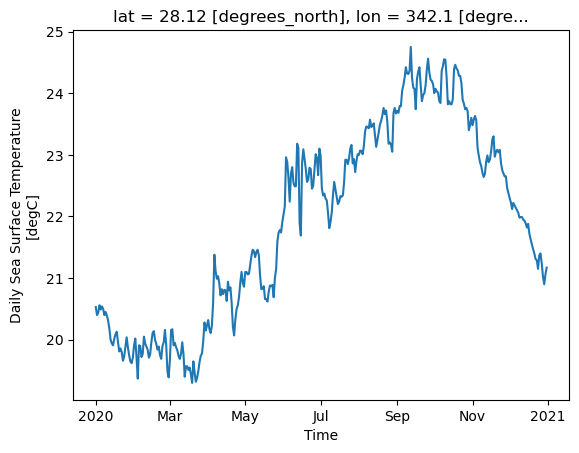

In [19]:
sst.sel(lon=(360-18), lat=28, method='nearest').plot();

Or, we can just plot the sst mean field during 2020, for the whole ocean:

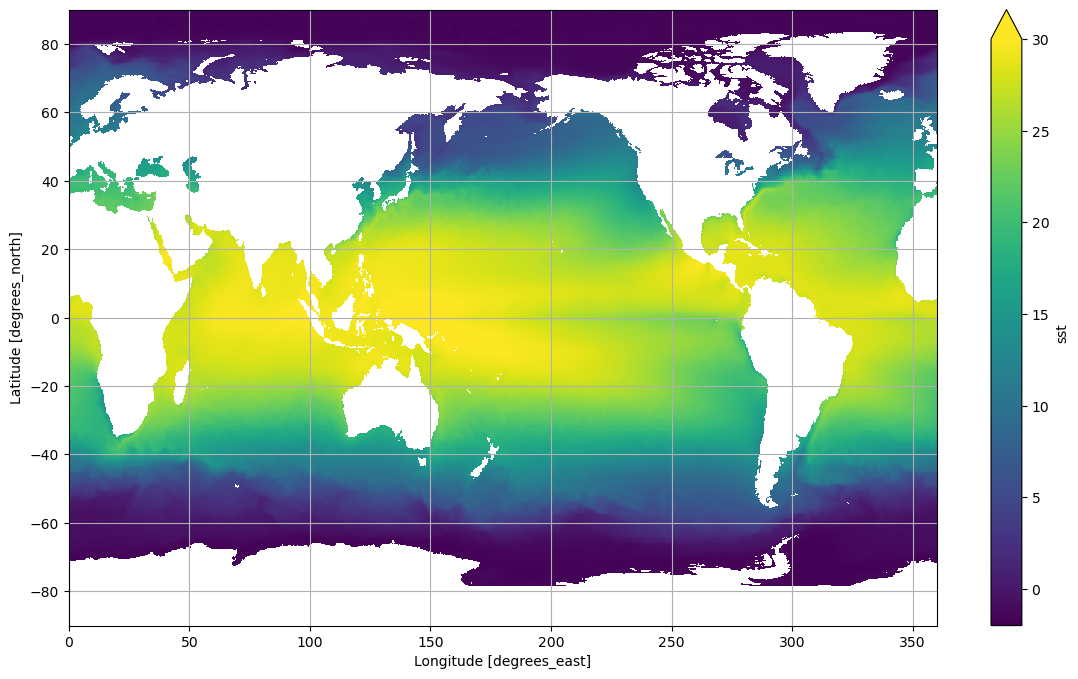

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
sst.mean(dim='time').plot(vmin=-2, vmax=30) #vmin and vmax is for the colobar range
ax.grid(); #adding a geographical grid

and how is the mean variation along the latitude:

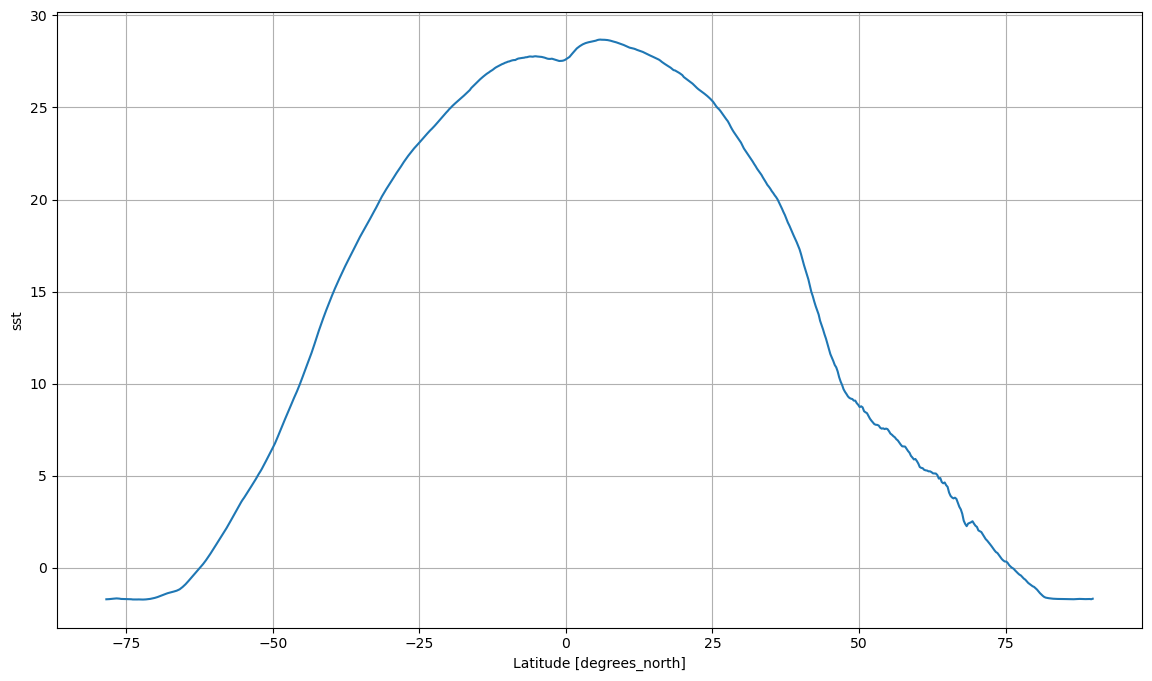

In [21]:
fig, ax = plt.subplots(figsize=(14,8))
sst.mean(dim=('time', 'lon')).plot();
ax.grid();

### Closing your netCDF file
It's good to close netCDF files:

In [22]:
xrDS.close()

## Remote data access via openDAP

With OPeNDAP, you can also accesss the data using an URL rather than a local path.  using xarray with a data server with OPEnDAP it is like having the file locally, the only difference is that you provide a different path.  OPeNDAP stand for [Open-source Project for a Network Data Access Protocol](https://earthdata.nasa.gov/collaborate/open-data-services-and-software/api/opendap)


**However, be aware that sometimes remote access could be very slowly or even fail**

In [23]:
dap_url="http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2020.nc"
dataOP = xr.open_dataset(dap_url,decode_times=False)

With OPeNDAP we have all the metaoinformation of a netcdf file:

In [24]:
dataOP

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 366, lat: 720, lon: 1440)
Coordinates:
  * time     (time) float64 3kB 8.035e+04 8.035e+04 ... 8.072e+04 8.072e+04
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:                     CF-1.5
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

We can select the first dat of the year and visualize it:

In [25]:
sst=dataOP.sst.isel(time=0).load()
lon=dataOP.lon.load()
lat=dataOP.lat.load()

we have used .load() to load the data locally, before that all the operation where just pointers to the data in the remote server

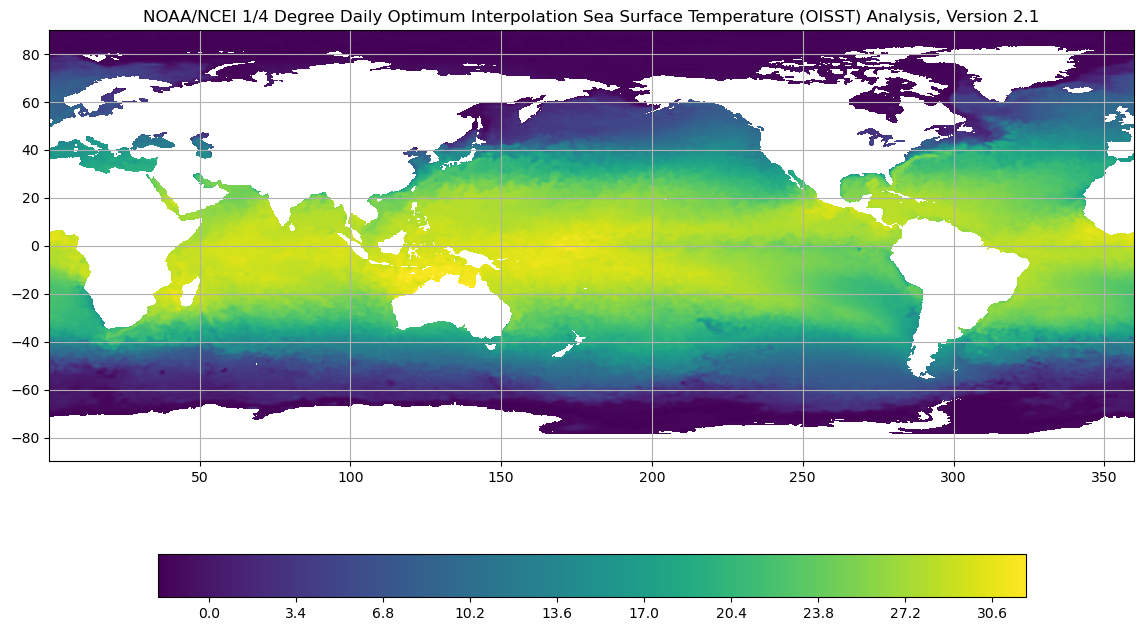

In [26]:
fig, ax = plt.subplots(figsize=(14,8))
cs=ax.contourf(lon,lat,sst,levels=np.arange(-2,32,.1))
ax.set_title(dataOP.title)
ax.grid()
fig.colorbar(cs, orientation='horizontal', shrink=0.8);